In [9]:
import numpy as np
import gzip

valid_labels = np.array([float(x.decode("utf-8").split("\t")[1]) for x in gzip.open("valid_labels.txt.gz",'rb')])

In [10]:
det_preds = np.array([
        [float(y) for y in x.decode("utf-8").split("\t")[1:]]
         for x in gzip.open("flip-False_rotamt-0/deterministic_preds.txt.gz", 'rb')])

In [11]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

print(roc_auc_score(y_true=1.0*(valid_labels > 0),
              y_score=1.0-det_preds[:,0]))
print(average_precision_score(y_true=1.0*(valid_labels > 0),
                        y_score=1.0-det_preds[:,0]))


0.9118638796723655
0.8741642180822626


In [13]:
mc_preds = []
for i in range(100):
    nondet_preds = np.array([
        [float(y) for y in x.split("\t")[1:]]
         for x in gzip.open("flip-False_rotamt-0/nondeterministic_preds_"+str(i)+".txt.gz", 'rb')])
    mc_preds.append(nondet_preds)
mc_preds = np.array(mc_preds)

In [14]:
print(roc_auc_score(y_true=1.0*(valid_labels > 0),
                    y_score=1.0-np.mean(mc_preds,axis=0)[:,0]))
print(average_precision_score(y_true=1.0*(valid_labels > 0),
                    y_score=1.0-np.mean(mc_preds,axis=0)[:,0]))

0.9129881925522251
0.8745019026871873


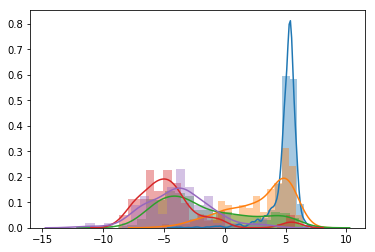

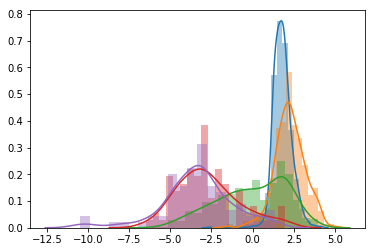

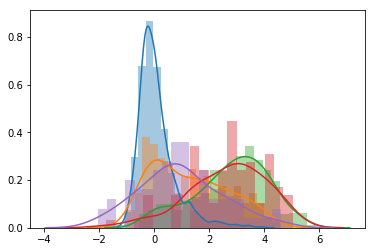

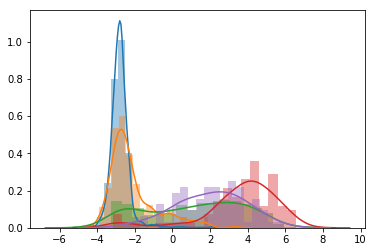

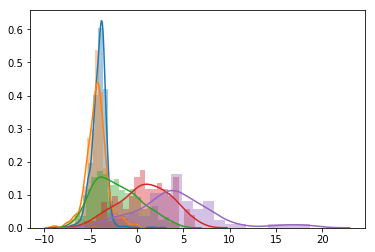

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
mean_mcpred = np.mean(mc_preds,axis=0)
mean_mcpred_logits = np.log(mean_mcpred)
mean_mcpred_logits = mean_mcpred_logits-np.mean(mean_mcpred_logits,axis=1)[:,None]

for i in range(5):
    sns.distplot(mean_mcpred_logits[:,0][valid_labels==i],
                 bins=20)
plt.show()
for i in range(5):
    sns.distplot(mean_mcpred_logits[:,1][valid_labels==i],
                 bins=20)
plt.show()
for i in range(5):
    sns.distplot(mean_mcpred_logits[:,2][valid_labels==i],
                 bins=20)
plt.show()
for i in range(5):
    sns.distplot(mean_mcpred_logits[:,3][valid_labels==i],
                 bins=20)
plt.show()
for i in range(5):
    sns.distplot(mean_mcpred_logits[:,4][valid_labels==i],
                 bins=20)
plt.show()